<h1> The Sparks Foundation (GRIP) </h1>

<h2> Author Name - Nikita Anil Nandanwar </h2> 

<h2> TASK 2 - Prediction using Unsupervised Machine Learning </h2>

<h2> From the given "Iris" dataset, predict the optimum number of clusters and represent it visually. </h2>

<h2> Installing and Importing Required Libraries </h2>

In [1]:
!pip install human-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
from hulearn.experimental.interactive import InteractiveCharts
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = pd.read_csv('D:/Spark Foundation/Task 2/Iris.csv')
iris.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.columns = ['Id','SepalLength','SepalWidth','PetalLength','PetalWidth','Class']

In [5]:
def splitname(string):
    string = string.split('-')
    return string[1]

iris['Class'] = iris['Class'].apply(lambda x:splitname(x))
species = list(iris['Class'].unique())
# mapper = {species[i]:i for i in range(len(species))}
# iris['Class'] = iris['Species'].map(mapper)
iris.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
clf = InteractiveCharts(dataf = iris,labels='Class')
clf.add_chart("SepalLength","SepalWidth",legend=False)

Loading BokehJS ...

In [7]:
clf.add_chart("PetalLength","PetalWidth",legend=False)

In [10]:
fig = px.scatter_3d(iris,x = 'SepalLength',y = 'SepalWidth',z = 'PetalWidth',color='Class')
fig.update_layout(title='The Iris Dataset',
                  titlefont=dict({'size':28, 'family': 'Courier New'}),
                  template='plotly',
                  paper_bgcolor='lightgray',
                  width=750, height=550,
                 )
fig.update_layout(scene = dict(xaxis = dict(backgroundcolor = "rgba(200,100,140)",
                              gridcolor = "black",
                              showbackground = True,
                              zerolinecolor = "black",),
                 yaxis = dict(backgroundcolor = "rgba(100,200,120)",
                 gridcolor = "black",
                 showbackground = True,
                 zerolinecolor = "black"),
                 zaxis = dict(backgroundcolor = "rgba(200,90,50)",
                             gridcolor = "black",
                             showbackground = True,
                             zerolinecolor = "black"),
                              ),
                 )
fig.show()
    

<b> Now as we're gonna apply the KMeans Algorithm on this,the Algorithm is very sensitive to outliers as well as Distributions,so lets have a look at the statistical plots of the features,and then make some changes in the Distribution of the Features! </b>

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Class']=le.fit_transform(iris['Class'])
iris['Class'].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

In [12]:
iris.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
train = iris.drop(['Class'],axis = 1)

In [14]:
import scipy.stats as stats

In [15]:
def makeplots(col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(iris[col],color='salmon')
    
    plt.subplot(1,3,2)
    stats.probplot(iris[col],dist='norm',plot=plt)
    
    
    plt.subplot(1,3,3)
    sn.boxplot(iris[col],color='pink')
    plt.show()

 Statistical Plots for the Feature : Id are shown ↓


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



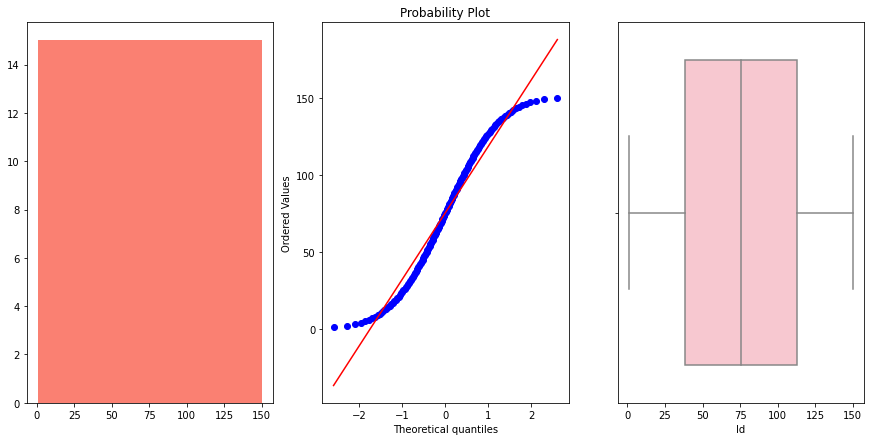

---------------------------------------------------------------------------
 Statistical Plots for the Feature : SepalLength are shown ↓


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



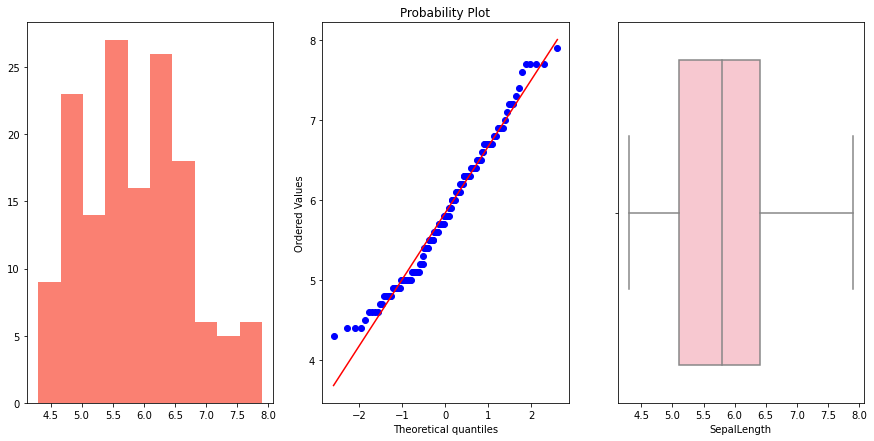

---------------------------------------------------------------------------
 Statistical Plots for the Feature : SepalWidth are shown ↓


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



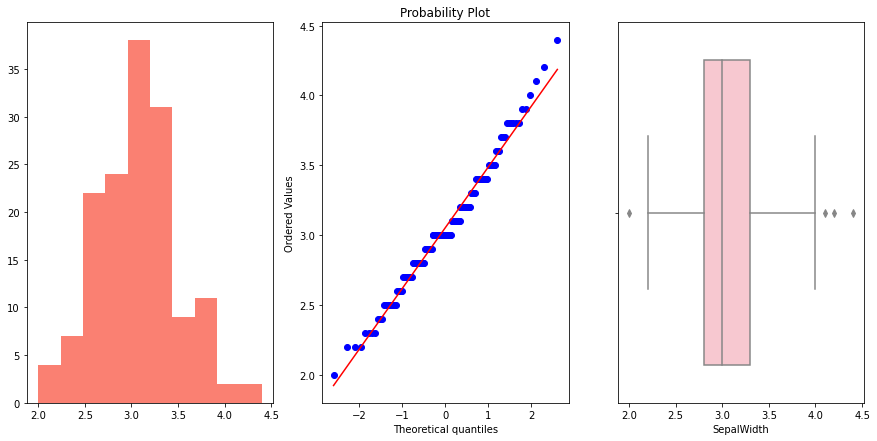

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalLength are shown ↓


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



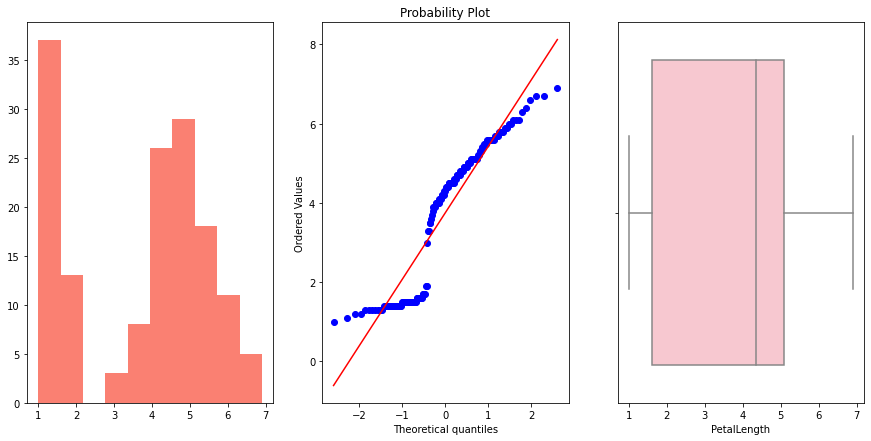

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalWidth are shown ↓


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



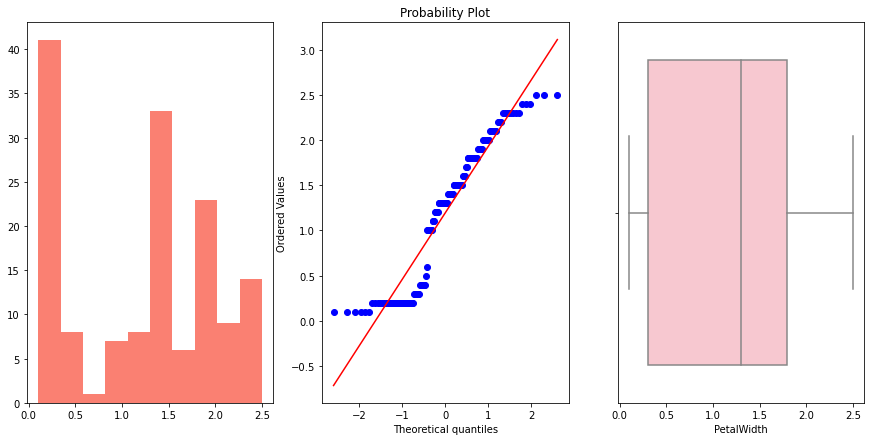

---------------------------------------------------------------------------


In [16]:
for i in train.columns:
    print(f' Statistical Plots for the Feature : {i} are shown ↓')
    makeplots(i)
    print("-"*75)

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

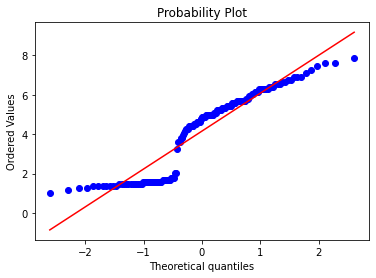

In [17]:
temp = train.copy()
temp['PetalLength'],params = stats.boxcox(temp['PetalLength']+1)
stats.probplot(temp['PetalLength'],dist = 'norm',plot=plt)

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

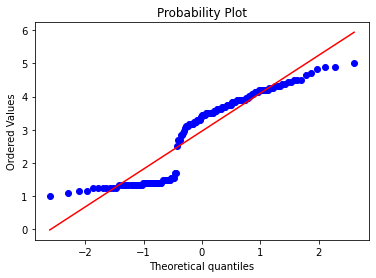

In [18]:
data = train.copy()
data['PetalLength'] = data.PetalLength**(1/1.2)
stats.probplot(data['PetalLength'],dist='norm',plot=plt)

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics


In [20]:
sc = StandardScaler()
train = iris.iloc[:,[0,1,2,3]].values
train_scaled = sc.fit_transform(train)

In [21]:
inertia_list = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(train)
    inertia_list.append(clf.inertia_)

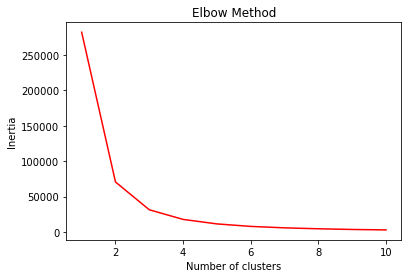

In [22]:
plt.plot(range(1,11),inertia_list,c = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
scaled_inertia = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(train_scaled)
    scaled_inertia.append(clf.inertia_)

In [24]:
scaled_inertia

[599.9999999999999,
 241.87865013553858,
 162.4270470434845,
 135.5910288396513,
 111.36883933833205,
 93.05717919398485,
 83.00241418588692,
 74.23665306015876,
 65.89548104551503,
 57.78140825038268]

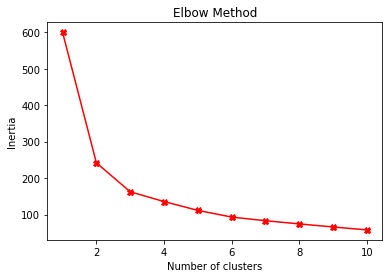

In [25]:
plt.plot(range(1,11),scaled_inertia,c = 'red',marker = 'X')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<b> From the above Elbow method we can observe that the optimal value for the number of clusters is 3,well even 4 can be possible,lets check what hyperparameter tuning is giving the result </b>

In [26]:
test = iris['Class'].values
params = {
    'n_clusters':[int(x) for x in range(1,11)],
    'init':['k-means++', 'random'],
    'max_iter':[int(x) for x in np.linspace(100,500,100)],
    'tol':[1e-4,1e-3,1e-2,0.025,0.05,0.25,0.5],
    'precompute_distances':['auto', True, False],
    'algorithm':['auto',"full", "elkan"]
}
clf = RandomizedSearchCV(estimator=KMeans(),param_distributions=params,cv = 5,n_iter=10,n_jobs=-1,
                        return_train_score=False,scoring = 'accuracy')
clf.fit(train,test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



RandomizedSearchCV(cv=5, estimator=KMeans(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'full', 'elkan'],
                                        'init': ['k-means++', 'random'],
                                        'max_iter': [100, 104, 108, 112, 116,
                                                     120, 124, 128, 132, 136,
                                                     140, 144, 148, 152, 156,
                                                     160, 164, 168, 172, 176,
                                                     180, 184, 188, 192, 196,
                                                     201, 205, 209, 213, 217, ...],
                                        'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10],
                                        'precompute_distances': ['auto', True,
                                                                 False],
                       

In [27]:
clf.best_estimator_

KMeans(algorithm='elkan', init='random', max_iter=225, n_clusters=1,
       precompute_distances=True, tol=0.5)

<b> So after the hyperparameter tuning step we can observe that the max clusters selected are 3, now lets make the predictions </b>

In [28]:
inertia_list = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(train)
    inertia_list.append(clf.inertia_)

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
predictions = kmeans.fit_predict(train)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [31]:
kmeans.cluster_centers_[0][:3][0]

125.5

In [32]:
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]

(array([125.5,  25.5,  75.5]), array([6.588, 5.006, 5.936]))

In [33]:
kmeans.cluster_centers_[:,0][0]

125.5

<h1> Cluster Visualization - 2D </h1>

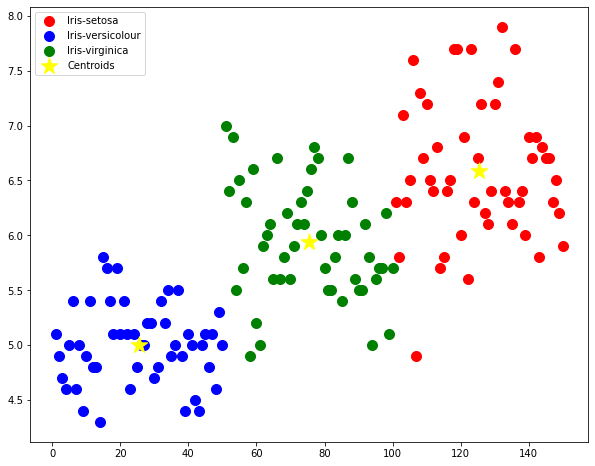

In [34]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(train[predictions == 0, 0], train[predictions == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(train[predictions == 1, 0], train[predictions == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(train[predictions == 2, 0], train[predictions == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 300, c = 'yellow', label = 'Centroids', marker='*')

plt.legend()

<h1> Cluster Visualization - 3D </h1>

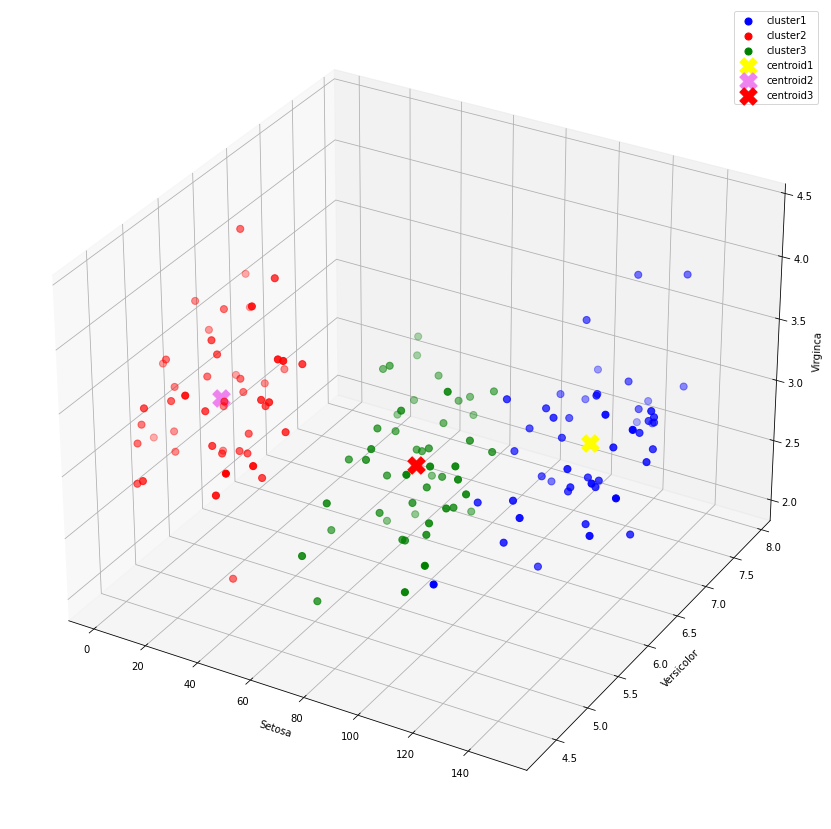

In [35]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(train[predictions==0,0],train[predictions==0,1],train[predictions==0,2],s = 50,color = 'blue',label = 'cluster1')
ax.scatter(train[predictions==1,0],train[predictions==1,1],train[predictions==1,2],s = 50,color = 'red',label = 'cluster2')
ax.scatter(train[predictions==2,0],train[predictions==2,1],train[predictions==2,2],s = 50,color = 'green',label = 'cluster3')

ax.scatter(kmeans.cluster_centers_[0][:3][0],kmeans.cluster_centers_[0][:3][1],kmeans.cluster_centers_[0][:3][2]
           ,s = 300,color = 'yellow',label = 'centroid1',marker = 'X')
ax.scatter(kmeans.cluster_centers_[1][:3][0],kmeans.cluster_centers_[1][:3][1],kmeans.cluster_centers_[1][:3][2]
           ,s = 300,color = 'violet',label = 'centroid2',marker = 'X')
ax.scatter(kmeans.cluster_centers_[2][:3][0],kmeans.cluster_centers_[2][:3][1],kmeans.cluster_centers_[2][:3][2]
           ,s = 300,color = 'red',label = 'centroid3',marker = 'X')

# ax.scatter(kmeans.cluster_centers_[:,0],0,0,color = 'yellow',s = 300,label = 'Centriod1')
# ax.scatter(kmeans.cluster_centers_[:,1],0,0,color = 'yellow',s = 300,label = 'Centriod1')
# ax.scatter(kmeans.cluster_centers_[:,2],0,0,color = 'yellow',s = 300,label = 'Centriod1')

# ax.scatter(kmeans.cluster_centers_[:,0][0],kmeans.cluster_centers_[:,0][1],kmeans.cluster_centers_[:,0][2]
#            ,s = 300,color = 'yellow',label = 'centroid')
# ax.scatter(kmeans.cluster_centers_[:,1][0],kmeans.cluster_centers_[:,1][1],kmeans.cluster_centers_[:,1][2]
#            ,s = 300,color = 'black',label = 'centroid')
# ax.scatter(kmeans.cluster_centers_[:,2][0],kmeans.cluster_centers_[:,2][1],kmeans.cluster_centers_[:,2][2]
#            ,s = 300,color = 'brown',label = 'centroid')
ax.set_xlabel('Setosa')
ax.set_ylabel('Versicolor')
ax.set_zlabel('Virginca')
ax.legend()
plt.show()